In [9]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib scikit-learn seaborn umap-learn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip3 install --upgrade pip


In [10]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt

# Oensingen 2018-19 Dataset Cleaning

In [11]:
df_1 = pd.read_csv("../datasets/Oensingen_2018-19.csv")
df_1.columns

Index(['TIMESTAMP', 'TA', 'RH', 'PA', 'Rg', 'PREC', 'SWC_0.05', 'SWC_0.15',
       'SWC_0.3', 'WFPS_0.05', 'WFPS_0.15', 'WFPS_0.3', 'TS_0.05', 'TS_0.15',
       'TS_0.3', 'PREC_rmean6', 'SWC_0.05_rmean6', 'SWC_0.15_rmean6',
       'SWC_0.3_rmean6', 'WFPS_0.05_rmean6', 'WFPS_0.15_rmean6',
       'WFPS_0.3_rmean6', 'TS_0.05_rmean6', 'TS_0.15_rmean6', 'TS_0.3_rmean6',
       'PREC_rmean6.6', 'PREC_rmean6.12', 'PREC_rmean6.18',
       'SWC_0.05_rmean6.6', 'SWC_0.05_rmean6.12', 'SWC_0.05_rmean6.18',
       'SWC_0.15_rmean6.6', 'SWC_0.15_rmean6.12', 'SWC_0.15_rmean6.18',
       'SWC_0.3_rmean6.6', 'SWC_0.3_rmean6.12', 'SWC_0.3_rmean6.18',
       'WFPS_0.05_rmean6.6', 'WFPS_0.05_rmean6.12', 'WFPS_0.05_rmean6.18',
       'WFPS_0.15_rmean6.6', 'WFPS_0.15_rmean6.12', 'WFPS_0.15_rmean6.18',
       'WFPS_0.3_rmean6.6', 'WFPS_0.3_rmean6.12', 'WFPS_0.3_rmean6.18',
       'TS_0.05_rmean6.6', 'TS_0.05_rmean6.12', 'TS_0.05_rmean6.18',
       'TS_0.15_rmean6.6', 'TS_0.15_rmean6.12', 'TS_0.15_rmean6.18',

In [12]:
df_1.head(10)

,TIMESTAMP,TA,RH,PA,Rg,PREC,SWC_0.05,SWC_0.15,SWC_0.3,WFPS_0.05,WFPS_0.15,WFPS_0.3,TS_0.05,TS_0.15,TS_0.3,PREC_rmean6,SWC_0.05_rmean6,SWC_0.15_rmean6,SWC_0.3_rmean6,WFPS_0.05_rmean6,WFPS_0.15_rmean6,WFPS_0.3_rmean6,TS_0.05_rmean6,TS_0.15_rmean6,TS_0.3_rmean6,PREC_rmean6.6,PREC_rmean6.12,PREC_rmean6.18,SWC_0.05_rmean6.6,SWC_0.05_rmean6.12,SWC_0.05_rmean6.18,SWC_0.15_rmean6.6,SWC_0.15_rmean6.12,SWC_0.15_rmean6.18,SWC_0.3_rmean6.6,SWC_0.3_rmean6.12,SWC_0.3_rmean6.18,WFPS_0.05_rmean6.6,WFPS_0.05_rmean6.12,WFPS_0.05_rmean6.18,WFPS_0.15_rmean6.6,WFPS_0.15_rmean6.12,WFPS_0.15_rmean6.18,WFPS_0.3_rmean6.6,WFPS_0.3_rmean6.12,WFPS_0.3_rmean6.18,TS_0.05_rmean6.6,TS_0.05_rmean6.12,TS_0.05_rmean6.18,TS_0.15_rmean6.6,TS_0.15_rmean6.12,TS_0.15_rmean6.18,TS_0.3_rmean6.6,TS_0.3_rmean6.12,TS_0.3_rmean6.18,harvest,Nmin,Norg,Nfert,soil,MGMT,timesince.PREC,timesince.Nfert,timesince.harvest,timesince.Nmin,timesince.Norg,timesince.soil,timesince.MGMT,VPD,VPD_rmean6,VPD_rmean6.6,VPD_rmean6.12,VPD_rmean6.18,GPP_f,Reco_f,NEE_f,N2O_flag0_ustar,N2O_RF_filled,CH4_flag01_ustar,CH4_RF_filled
0,12.07.2018 00:15,13.062189,79.046121,96369.96900,0.000000,0.0,19.522466,32.070093,25.374839,36.691159,60.273579,47.690300,16.782333,18.417333,19.150333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.155498,NaN,NaN,NaN,NaN,-1.943096,2.959257,4.092353,NaN,1.147583,NaN,27.990480
1,12.07.2018 00:45,11.692284,85.351147,96358.57800,0.000000,0.0,19.463796,32.056941,25.375206,36.580893,60.248861,47.690991,16.603333,18.313333,19.091667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.015854,NaN,NaN,NaN,NaN,-8.389943,2.708777,11.098720,NaN,0.588656,NaN,13.194327
2,12.07.2018 01:15,11.244143,88.430422,96337.89300,0.000000,0.0,19.449601,32.053857,25.355512,36.554215,60.243064,47.653977,16.118889,18.063704,19.027778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.545509,NaN,NaN,NaN,NaN,0.209083,2.625977,2.416894,NaN,1.693450,29.8993,29.899300
3,12.07.2018 01:45,10.911893,90.632783,96317.81333,0.000000,0.0,19.440302,32.026473,25.349003,36.536738,60.191598,47.641744,15.836786,17.887500,18.972143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.223965,NaN,NaN,NaN,NaN,4.415999,2.564262,-1.851736,NaN,1.277224,NaN,11.775420
4,12.07.2018 02:15,10.491306,91.983479,96341.16800,0.000000,0.0,19.373920,32.002699,25.349094,36.411977,60.146917,47.641915,15.556667,17.697000,18.906667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.018498,NaN,NaN,NaN,NaN,16.156236,2.488478,-13.667758,NaN,1.202792,NaN,11.362922
5,12.07.2018 02:45,10.123311,91.926096,96350.50867,0.000000,0.0,19.313659,31.961861,25.322967,36.298720,60.070164,47.592810,15.291000,17.511333,18.845333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.000836,NaN,NaN,NaN,NaN,7.034126,2.422614,-4.611512,NaN,1.056617,NaN,11.497405
6,12.07.2018 03:15,10.111039,91.331066,96344.31933,0.000000,0.0,19.294805,31.942024,25.327126,36.263285,60.032883,47.600627,15.033667,17.318667,18.774667,0.0,19.389347,32.007309,25.346485,36.440971,60.155581,47.637011,15.740057,17.798590,18.

In [16]:
# filter out rows without a response variable
df_1_no_na = df_1[df_1["N2O_flag0_ustar"].notna()]

cols = [
    # Target
    "N2O_flag0_ustar",

    # Timestamp
    "TIMESTAMP",
    
    # Predictors
    "NEE_f",
    "GPP_f",
    "Reco_f",
    "Rg",
    "TA",
    "PREC",
    "VPD",                     # Vapor pressure deficit
    "SWC_0.05",
    "SWC_0.15",
    "SWC_0.3",
    "TS_0.05",
    "TS_0.15",
    "TS_0.3",
    "harvest",
    "Norg",
    "Nmin",
    "soil"
]

oensingen_18_19 = df_1_no_na[cols]

rename_map = {
    "N2O_flag0_ustar": "N2O_Flux",
    "TIMESTAMP": "Timestamp",
    "NEE_f": "NEE",            # Net CO₂ exchange between field and atmosphere (positive = CO₂ released, negative = CO₂ uptake)
    "GPP_f": "GPP",            # Total CO₂ fixed by photosynthesis (proxy for plant growth)
    "Reco_f": "RECO",          # CO₂ emitted via respiration of plants and soil organisms
    "Rg": "SolarRadiation",
    "TA": "AirTemp",
    "PREC": "Precipitation",
    "SWC_0.05": "SoilWater_5cm",
    "SWC_0.15": "SoilWater_15cm",
    "SWC_0.3": "SoilWater_30cm",
    "TS_0.05": "SoilTemp_5cm",
    "TS_0.15": "SoilTemp_15cm",
    "TS_0.3": "SoilTemp_30cm",
    "harvest": "Mowing",
    "Norg": "FertilizerOrganic",
    "Nmin": "FertilizerMineral",
    "soil": "SoilCultivation",
}

oensingen_1 = oensingen_18_19.rename(columns=rename_map)
oensingen_1["Timestamp"] = pd.to_datetime(oensingen_1["Timestamp"], dayfirst=True)

In [17]:
oensingen_1.head(10)

,N2O_Flux,Timestamp,NEE,GPP,RECO,SolarRadiation,AirTemp,Precipitation,VPD,SoilWater_5cm,SoilWater_15cm,SoilWater_30cm,SoilTemp_5cm,SoilTemp_15cm,SoilTemp_30cm,Mowing,FertilizerOrganic,FertilizerMineral,SoilCultivation
15,0.333021,2018-07-12 07:45:00,-4.006840,7.490222,3.483382,447.525897,16.313117,0.0,6.105563,19.153554,31.725870,25.273149,15.503667,16.377333,18.057333,0.0,0.0,0.0,0.0
17,0.506338,2018-07-12 08:45:00,-0.628629,4.478102,3.849473,613.816676,18.237812,0.0,8.232653,19.297162,31.702366,25.254741,16.670741,16.673704,17.951852,1.0,0.0,0.0,0.0
18,0.626398,2018-07-12 09:15:00,0.345373,3.704597,4.049970,686.580910,19.261472,0.0,9.885997,19.383642,31.697955,25.230584,17.264000,16.901000,17.904000,1.0,0.0,0.0,0.0
19,0.440995,2018-07-12 09:45:00,-3.511570,7.716858,4.205288,753.081073,20.051294,0.0,11.443435,19.451197,31.681595,25.196959,17.880000,17.159667,17.888000,1.0,0.0,0.0,0.0
21,0.463090,2018-07-12 10:45:00,-4.183495,8.634450,4.450955,857.719799,21.299094,0.0,12.928314,19.607464,31.645481,25.160241,19.475667,17.803000,17.890000,1.0,0.0,0.0,0.0
22,0.447891,2018-07-12 11:15:00,-4.004477,8.583735,4.579258,895.806149,21.941599,0.0,13.730180,19.652866,31.631911,25.141217,20.337333,18.210000,17.912333,1.0,0.0,0.0,0.0
24,0.540302,2018-07-12 12:15:00,-2.445051,7.261238,4.816186,939.671255,23.122383,0.0,16.030123,19.779720,31.666210,25.100169,22.022333,19.104333,18.025333,1.0,0.0,0.0,0.0
25,0.391302,2018-07-12 12:45:00,-1.553447,6.470055,4.916608,944.525645,23.625115,0.0,17.207798,19.807268,31.678548,25.075724,22.817000,19.579333,18.098667,1.0,0.0,0.0,0.0
26,0.563305,2018-07-12 13:15:00,-3.554865,8.535702,4.980837,927.970565,23.960965,0.0,17.529349,19.844858,31.681672,25.060100,23.456667,20.037000,18.196000,1.0,0.0,0.0,0.0
27,0.476368,2018-07-12 13:45:00,-3.408119,8.524872,5.116753,882.649028,24.621321,0.0,18.523718,19.878924,31.687611,25.041491,23.786333,20.485333,18.308667,1.0,0.0,0.0,0.0


In [27]:
oensingen_1.to_csv("../datasets/Oensingen_2018-19_clean.csv")

# Oensingen 2021-23 Dataset Cleaning

In [18]:
# Oensingen 2021-23 dataset
df_2 = pd.read_csv("../datasets/Oensingen_2021-23.csv")
df_2.columns

/var/folders/_3/dhm9h5w122sfbk56zms0llk00000gn/T/ipykernel_16233/4265428201.py:2: DtypeWarning: Columns (628) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv("../datasets/Oensingen_2021-23.csv")


Index(['TIMESTAMP_MIDDLE', 'AIR_CP', 'AIR_DENSITY', 'AIR_MV', 'AIR_RHO_CP',
       'AOA_METHOD', 'AXES_ROTATION_METHOD', 'BADM_HEIGHTC',
       'BADM_INSTPAIR_EASTWARD_SEP_GA_CH4',
       'BADM_INSTPAIR_EASTWARD_SEP_GA_CO2',
       ...
       'GPP_U16_f_reddyproc', 'NEE_U50_f_reddyproc', 'Reco_U50_reddyproc',
       'GPP_U50_f_reddyproc', 'NEE_U84_f_reddyproc', 'Reco_U84_reddyproc',
       'GPP_U84_f_reddyproc', 'LE_f_reddyproc', 'H_f_reddyproc',
       'ET_f_reddyproc'],
      dtype='object', length=730)

In [19]:
df_2.head(10)

,TIMESTAMP_MIDDLE,AIR_CP,AIR_DENSITY,AIR_MV,AIR_RHO_CP,AOA_METHOD,AXES_ROTATION_METHOD,BADM_HEIGHTC,BADM_INSTPAIR_EASTWARD_SEP_GA_CH4,BADM_INSTPAIR_EASTWARD_SEP_GA_CO2,BADM_INSTPAIR_EASTWARD_SEP_GA_H2O,BADM_INSTPAIR_EASTWARD_SEP_GA_N2O,BADM_INSTPAIR_HEIGHT_SEP_GA_CH4,BADM_INSTPAIR_HEIGHT_SEP_GA_CO2,BADM_INSTPAIR_HEIGHT_SEP_GA_H2O,BADM_INSTPAIR_HEIGHT_SEP_GA_N2O,BADM_INSTPAIR_NORTHWARD_SEP_GA_CH4,BADM_INSTPAIR_NORTHWARD_SEP_GA_CO2,BADM_INSTPAIR_NORTHWARD_SEP_GA_H2O,BADM_INSTPAIR_NORTHWARD_SEP_GA_N2O,BADM_INST_AVERAGING_INT,BADM_INST_GA_CP_TUBE_FLOW_RATE_GA_CH4,BADM_INST_GA_CP_TUBE_FLOW_RATE_GA_CO2,BADM_INST_GA_CP_TUBE_FLOW_RATE_GA_H2O,BADM_INST_GA_CP_TUBE_FLOW_RATE_GA_N2O,BADM_INST_GA_CP_TUBE_IN_DIAM_GA_CH4,BADM_INST_GA_CP_TUBE_IN_DIAM_GA_CO2,BADM_INST_GA_CP_TUBE_IN_DIAM_GA_H2O,BADM_INST_GA_CP_TUBE_IN_DIAM_GA_N2O,BADM_INST_GA_CP_TUBE_LENGTH_GA_CH4,BADM_INST_GA_CP_TUBE_LENGTH_GA_CO2,BADM_INST_GA_CP_TUBE_LENGTH_GA_H2O,BADM_INST_GA_CP_TUBE_LENGTH_GA_N2O,BADM_INST_HEIGHT_SA,BADM_INST_SAMPLING_INT,BADM_LOCATION_ELEV,BADM_LOCATION_LAT,BADM_LOCATION_LONG,BADM_SA_OFFSET_NORTH,BOWEN,BURBA_METHOD,CH4,CH4_ABSLIM_NREX,CH4_DIAG_NREX,CH4_KID,CH4_LGD,CH4_MEAS_KUR,CH4_MEAS_MEDIAN,CH4_MEAS_N2O_MEAS_COV,CH4_MEAS_P25,CH4_MEAS_P75,CH4_MEAS_SIGMA,CH4_MEAS_SKW,CH4_MEAS_TYPE,CH4_MIXING_RATIO,CH4_MOLAR_DENSITY,CH4_NR,CH4_NUM_SPIKES,CH4_SPIKE_NREX,CH4_TLAG_ACTUAL,CH4_TLAG_MAX,CH4_TLAG_MIN,CH4_TLAG_NOMINAL,CH4_TLAG_USED,CH4_VM97_TEST,CH4_ZCD,CO2,CO2_ABSLIM_NREX,CO2_DIAG_NREX,CO2_KID,CO2_LGD,CO2_MEAS_H2O_MEAS_COV,CO2_MEAS_KUR,CO2_MEAS_MEDIAN,CO2_MEAS_P25,CO2_MEAS_P75,CO2_MEAS_SIGMA,CO2_MEAS_SKW,CO2_MEAS_TYPE,CO2_MIXING_RATIO,CO2_MOLAR_DENSITY,CO2_NR,CO2_NUM_SPIKES,CO2_SPIKE_NREX,CO2_TLAG_ACTUAL,CO2_TLAG_MAX,CO2_TLAG_MIN,CO2_TLAG_NOMINAL,CO2_TLAG_USED,CO2_VM97_TEST,CO2_ZCD,CUSTOM_AIR_P_MEAN,CUSTOM_CH4_MEAN,CUSTOM_CO2_MEAN,CUSTOM_COOLER_V_MEAN,CUSTOM_DATA_SIZE_IRGA72_MEAN,CUSTOM_DATA_SIZE_LGR_MEAN,CUSTOM_FILTER_NR,CUSTOM_FILTER_NREX,CUSTOM_FIT_FLAG_MEAN,CUSTOM_FLOWRATE_MEAN,CUSTOM_GA_DIAG_CODE_IRGA72_MEAN,CUSTOM_H2O_MEAN,CUSTOM_MIRROR_RINGDOWNTIME_MEAN,CUSTOM_N2O_MEAN,CUSTOM_SIGNAL_STRENGTH_IRGA72_MEAN,CUSTOM_STATUS_CODE_IRGA72_MEAN,CUSTOM_STATUS_CODE_LGR_MEAN,CUSTOM_T_UNKNOWN_MEAN,DENTRENDING_TIME_CONSTANT,DETRENDING_METHOD,DISPLACEMENT_HEIGHT,DOY_END,DOY_START,DRYAIR_DENSITY,DRYAIR_MV,DRYAIR_PARTIAL_PRESSURE,ET,ET_CORRDIFF,ET_RANDUNC_HF,ET_SCF,ET_SSITC_TEST,ET_STAGE1,ET_STAGE2,ET_UNCORR,EXPECT_NR,FC,FCH4,FCH4_CORRDIFF,FCH4_NR,FCH4_NSR,FCH4_RANDUNC_HF,FCH4_SCF,FCH4_SS,FCH4_SSITC_TEST,FCH4_SS_TEST,FCH4_STAGE1,FCH4_STAGE2,FCH4_UNCORR,FCH4_VADV,FC_CORRDIFF,FC_NR,FC_NSR,FC_RANDUNC_HF,FC_SCF,FC_SS,FC_SSITC_TEST,FC_SS_TEST,FC_STAGE1,FC_STAGE2,FC_UNCORR,FC_VADV,FETCH_10,FETCH_30,FETCH_50,FETCH_70,FETCH_80,FETCH_90,FETCH_MAX,FETCH_OFFSET,FH2O,FH2O_CORRDIFF,FH2O_NSR,FH2O_RANDUNC_HF,FH2O_SCF,FH2O_SS,FH2O_SSITC_TEST,FH2O_SS_TEST,FH2O_STAGE1,FH2O_STAGE2,FH2O_UNCORR,FH2O_VADV,FILE_NR,FILE_TIME_DURATION,FLAG_PPFD_IN_ISFILLED,FLAG_SWC_0.05_gfXG_ISFILLED,FLAG_SWC_0.15_gfXG_ISFILLED,FLAG_SWC_0.3_gfXG_ISFILLED,FLAG_SWC_0.5_gfXG_ISFILLED,FLAG_SW_IN_ISFILLED,FLAG_TA_ISFILLED,FLAG_TS_0.05_gfXG_ISFILLED,FLAG_TS_0.15_gfXG_ISFILLED,FLAG_TS_0.3_gfXG_ISFILLED,FLAG_TS_0.5_gfXG_ISFILLED,FLAG_VPD_ISFILLED,FN2O,FN2O_CORRDIFF,FN2O_NR,FN2O_NSR,FN2O_RANDUNC_HF,FN2O_SCF,FN2O_SS,FN2O_SSITC_TEST,FN2O_SS_TEST,FN2O_STAGE1,FN2O_STAGE2,FN2O_UNCORR,FN2O_VADV,FOOTPRINT_MODEL,H,H2O,H2O_ABSLIM_NREX,H2O_DIAG_NREX,H2O_KID,H2O_LGD,H2O_MEAS_CH4_MEAS_COV,H2O_MEAS_KUR,H2O_MEAS_MEDIAN,H2O_MEAS_N2O_MEAS_COV,H2O_MEAS_P25,H2O_MEAS_P75,H2O_MEAS_SIGMA,H2O_MEAS_SKW,H2O_MEAS_TYPE,H2O_MIXING_RATIO,H2O_MOLAR_DENSITY,H2O_NR,H2O_NUM_SPIKES,H2O_SPIKE_NREX,H2O_TLAG_ACTUAL,H2O_TLAG_MAX,H2O_TLAG_MIN,H2O_TLAG_NOMINAL,H2O_TLAG_USED,H2O_VM97_TEST,H2O_ZCD,HPATH_GA_CH4,HPATH_GA_CO2,HPATH_GA_H2O,HPATH_GA_N2O,HPATH_SA,H_CORRDIFF,H_NR,H_NSR,H_RANDUNC_HF,H_SCF,H_SS,H_SSITC_TEST,H_SS_TEST,H_STAGE1,H_STAGE2,H_UNCORR,INST_LI7200_AGC_OR_RSSI,INST_LI7500_AGC_OR_RSSI,LE,LE_CORRDIFF,LE_NR,LE_RANDUNC_HF,LE_SCF,LE_SSITC_TEST,LE_STAGE1,LE

In [24]:
# filter out rows without a response variable
df_2_no_na = df_2[df_2["FN2O_L3.1_L3.3_CUT_50_QCF0"].notna()]

cols = [
    # Target
    "FN2O_L3.1_L3.3_CUT_50_QCF0",

    # Timestamp
    "TIMESTAMP_MIDDLE",
    
    # Predictors
    "NEE_L3.1_L3.3_CUT_50_QCF_gfRF",
    "GPP_U50_f_reddyproc",
    "Reco_U50_reddyproc",
    "SW_IN",
    "TA",
    "PREC",
    "VPD",                     # Vapor pressure deficit
    "SWC_0.05",
    "SWC_0.15",
    "SWC_0.3",
    "TS_0.05",
    "TS_0.15",
    "TS_0.3",
    "MGMT_HARVEST",
    "MGMT_FERT_ORG",
    "MGMT_FERT_MIN",
    "MGMT_SOILCULTIVATION"
]

oensingen_21_23 = df_2_no_na[cols]

rename_map = {
    "FN2O_L3.1_L3.3_CUT_50_QCF0": "N2O_Flux",
    "TIMESTAMP_MIDDLE": "Timestamp",
    "NEE_L3.1_L3.3_CUT_50_QCF_gfRF": "NEE",    # Net CO₂ exchange between field and atmosphere (positive = CO₂ released, negative = CO₂ uptake)
    "GPP_U50_f_reddyproc": "GPP",            # Total CO₂ fixed by photosynthesis (proxy for plant growth)
    "Reco_U50_reddyproc": "RECO",            # CO₂ emitted via respiration of plants and soil organisms
    "SW_IN": "SolarRadiation",
    "TA": "AirTemp",
    "PREC": "Precipitation",
    "SWC_0.05": "SoilWater_5cm",
    "SWC_0.15": "SoilWater_15cm",
    "SWC_0.3": "SoilWater_30cm",
    "TS_0.05": "SoilTemp_5cm",
    "TS_0.15": "SoilTemp_15cm",
    "TS_0.3": "SoilTemp_30cm",
    "MGMT_HARVEST": "Mowing",
    "MGMT_FERT_ORG": "FertilizerOrganic",
    "MGMT_FERT_MIN": "FertilizerMineral",
    "MGMT_SOILCULTIVATION": "SoilCultivation",
}

oensingen_2 = oensingen_21_23.rename(columns=rename_map)
oensingen_2["Timestamp"] = pd.to_datetime(oensingen_2["Timestamp"], dayfirst=True)

/var/folders/_3/dhm9h5w122sfbk56zms0llk00000gn/T/ipykernel_16233/3646656026.py:55: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  oensingen_2["Timestamp"] = pd.to_datetime(oensingen_2["Timestamp"], dayfirst=True)


In [25]:
oensingen_2.head(10)

,N2O_Flux,Timestamp,NEE,GPP,RECO,SolarRadiation,AirTemp,Precipitation,VPD,SoilWater_5cm,SoilWater_15cm,SoilWater_30cm,SoilTemp_5cm,SoilTemp_15cm,SoilTemp_30cm,Mowing,FertilizerOrganic,FertilizerMineral,SoilCultivation
29113,-0.330520,2022-08-30 11:45:00,-16.411145,19.591447,7.165971,687.529222,24.553782,0.0,1.034754,16.341716,11.396077,15.095581,21.643333,19.703333,19.237779,0.0,0.0,0.0,0.0
29116,-0.101050,2022-08-30 13:15:00,-9.836550,18.380349,7.651707,545.012785,26.430326,0.0,1.584009,16.730519,11.365016,15.092065,23.147222,19.947778,19.245000,0.0,0.0,0.0,0.0
29117,-0.273075,2022-08-30 13:45:00,-10.141052,12.307045,7.681075,653.722075,27.394110,0.0,1.723843,16.753396,11.378849,15.089371,23.397778,20.078889,19.266666,0.0,0.0,0.0,0.0
29118,-0.214462,2022-08-30 14:15:00,-10.728642,8.457400,7.243798,745.734649,28.201293,0.0,1.971700,16.807034,11.390797,15.083162,23.776110,20.208888,19.287221,0.0,0.0,0.0,0.0
29120,0.371677,2022-08-30 15:15:00,-1.213602,8.977221,7.311176,289.319679,26.147860,0.0,1.452522,16.858810,11.403868,15.082458,24.241666,20.460000,19.369445,0.0,0.0,0.0,0.0
29123,0.387470,2022-08-30 16:45:00,4.320451,1.221604,6.697297,135.306536,25.215960,0.0,1.508241,16.724853,11.413170,15.095112,23.557777,20.808333,19.483334,0.0,0.0,0.0,0.0
29124,0.523018,2022-08-30 17:15:00,6.052348,-0.496317,6.221943,68.202154,24.750614,0.0,1.294332,16.642411,11.416940,15.095229,23.213333,20.904444,19.555000,0.0,0.0,0.0,0.0
29129,-0.027759,2022-08-30 19:45:00,3.149888,-0.421248,5.610350,0.000000,19.539278,0.0,0.438117,16.373484,11.437920,15.104130,21.840000,21.000000,19.781110,0.0,0.0,0.0,0.0
29153,0.406605,2022-08-31 07:45:00,0.113053,3.680885,5.617761,83.727530,16.715810,0.0,0.047249,15.726542,11.417946,14.978778,19.300000,19.899444,19.580000,0.0,0.0,0.0,0.0
29154,0.469328,2022-08-31 08:15:00,0.129284,4.635532,5.470047,98.092091,17.238071,0.0,0.078998,15.721684,11.415809,14.982536,19.344444,19.900000,19.562223,0.0,0.0,0.0,0.0


In [26]:
oensingen_2.to_csv("../datasets/Oensingen_2021-23_clean.csv")

# Further Analysis and Checks

## Oensingen 2018-19

In [44]:
# Ensure timestamp is datetime and sorted
oensingen_1 = oensingen_1.sort_values("Timestamp")

# Compute time difference between consecutive timestamps
oensingen_1["time_diff"] = oensingen_1["Timestamp"].diff()

# Look at large gaps
print(oensingen_1["time_diff"].describe())
oensingen_1[oensingen_1["time_diff"] > "3 days"].head(50)

count                         3268
mean     0 days 03:18:07.821297429
std      4 days 23:12:43.018692418
min                0 days 00:30:00
25%                0 days 00:30:00
50%                0 days 00:30:00
75%                0 days 01:00:00
max              283 days 22:30:00
Name: time_diff, dtype: object


,N2O_Flux,Timestamp,NEE,GPP,RECO,SolarRadiation,AirTemp,Precipitation,VPD,SoilWater_5cm,SoilWater_15cm,SoilWater_30cm,SoilTemp_5cm,SoilTemp_15cm,SoilTemp_30cm,Mowing,FertilizerOrganic,FertilizerMineral,SoilCultivation,time_diff
18076,0.440229,2019-07-23 14:15:00,2.149382,3.986865,5.923859,815.29668,33.329049,0.0,35.032487,20.979197,19.25675,18.08988,24.466667,22.3,19.966667,1.0,0.0,NaN,0.0,283 days 22:30:00


## Oensingen 2021-23

In [45]:
# Ensure timestamp is datetime and sorted
oensingen_2 = oensingen_2.sort_values("Timestamp")

# Compute time difference between consecutive timestamps
oensingen_2["time_diff"] = oensingen_2["Timestamp"].diff()

# Look at large gaps
print(oensingen_2["time_diff"].describe())
oensingen_2[oensingen_2["time_diff"] > "3 days"].head(50)

count                         6641
mean     0 days 01:26:57.316669176
std      0 days 05:04:08.891237911
min                0 days 00:30:00
25%                0 days 00:30:00
50%                0 days 00:30:00
75%                0 days 01:00:00
max                9 days 14:00:00
Name: time_diff, dtype: object


,N2O_Flux,Timestamp,NEE,GPP,RECO,SolarRadiation,AirTemp,Precipitation,VPD,SoilWater_5cm,SoilWater_15cm,SoilWater_30cm,SoilTemp_5cm,SoilTemp_15cm,SoilTemp_30cm,Mowing,FertilizerOrganic,FertilizerMineral,SoilCultivation,time_diff
29926,0.960903,2022-09-16 10:15:00,5.617257,24.402453,9.281678,35.926946,15.290261,0.0,0.248873,25.110992,19.031319,23.452006,17.827222,18.000000,17.866667,0.0,0.0,0.0,0.0,5 days 06:30:00
30752,0.232072,2022-10-03 15:15:00,-5.937087,10.632979,5.899524,250.211960,14.851006,0.0,0.411083,27.432226,26.047618,26.524755,15.000000,14.500000,14.072222,0.0,0.0,0.0,0.0,4 days 12:30:00
36130,0.853985,2023-01-23 16:15:00,2.117763,-0.757795,1.389612,6.413253,0.084133,0.0,0.077188,41.552672,33.396100,29.532612,0.886667,2.042222,2.408889,0.0,0.0,0.0,0.0,9 days 14:00:00
36837,0.076286,2023-02-07 09:45:00,-0.947800,4.781591,1.728432,260.442801,-1.262055,0.0,0.106551,42.541991,33.639191,29.489533,1.595000,3.105000,3.400000,0.0,0.0,0.0,0.0,5 days 19:00:00
39873,2.386543,2023-04-11 15:45:00,-15.152004,9.350242,6.670390,260.811802,11.933611,0.0,0.628607,43.776086,34.330210,30.769085,10.035556,9.100000,8.608333,0.0,0.0,0.0,0.0,5 days 04:00:00


# PCA plots

## Oensingen 2018-19

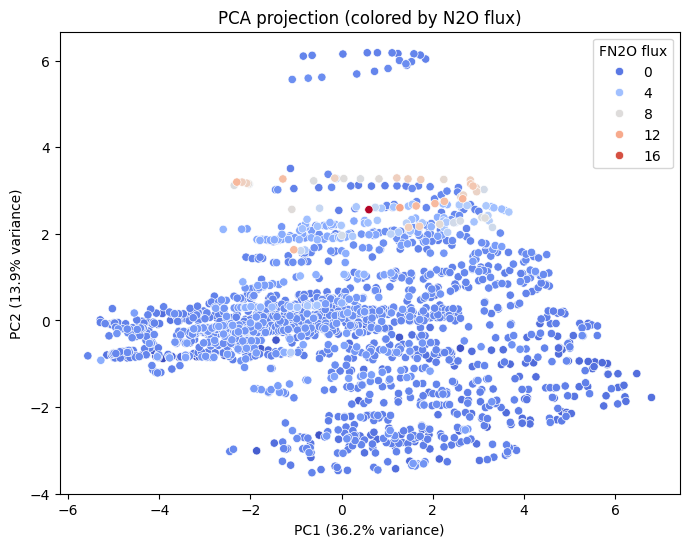

In [36]:
oensingen_1_clean = oensingen_1.dropna()
oensingen_1_clean = oensingen_1_clean.sort_values(
    by="N2O_Flux",
    ascending=True  # ascending puts zeros first, descending puts them last
)

X_1 = oensingen_1_clean.drop(columns=["N2O_Flux", "Timestamp", "time_diff"])
y_1 = oensingen_1_clean["N2O_Flux"]

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize predictors
X_scaled_1 = StandardScaler().fit_transform(X_1)

# Run PCA (2 components for visualization)
pca_1 = PCA(n_components=2)
X_pca_1 = pca_1.fit_transform(X_scaled_1)

# Create DataFrame for plotting
pca_df_1 = pd.DataFrame(X_pca_1, columns=['PC1', 'PC2'])
pca_df_1["FN2O"] = y_1.values

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df_1, x="PC1", y="PC2", hue="FN2O", palette="coolwarm")
plt.title("PCA projection (colored by N2O flux)")
plt.xlabel(f"PC1 ({pca_1.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca_1.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(title="FN2O flux", loc="best")
plt.show()

In [37]:
loadings = pd.DataFrame(
    pca_1.components_.T,
    index=X_1.columns,
    columns=["PC1", "PC2"]
)
print(loadings.sort_values("PC1", ascending=False))

                        PC1       PC2
AirTemp            0.384823  0.030992
SoilTemp_5cm       0.382088 -0.013489
RECO               0.365963 -0.096313
SoilTemp_15cm      0.359145 -0.021056
VPD                0.345937  0.013855
GPP                0.317215 -0.012768
SoilTemp_30cm      0.287082 -0.059358
SolarRadiation     0.250722  0.108623
SoilWater_30cm     0.096647  0.542674
SoilWater_15cm     0.049613  0.598632
Mowing             0.010846  0.262801
Precipitation     -0.011927  0.014408
FertilizerOrganic -0.012660  0.007222
SoilCultivation   -0.037320  0.001499
FertilizerMineral -0.045482  0.000346
SoilWater_5cm     -0.133067  0.500169
NEE               -0.209857 -0.033324


## Oensingen 2021-23

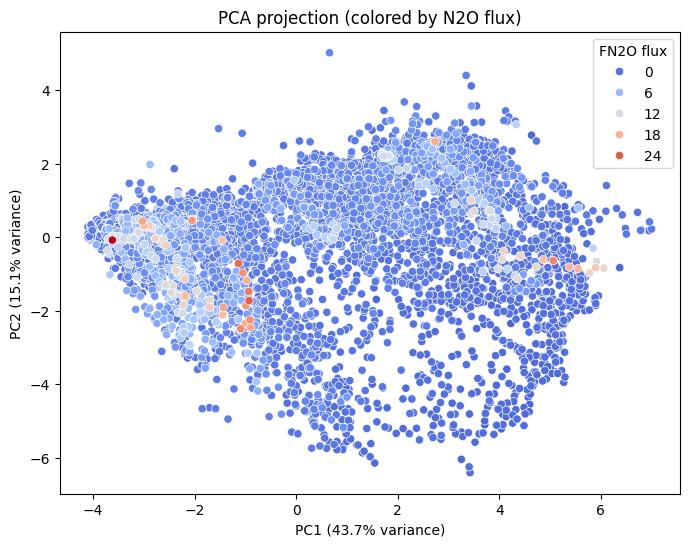

In [38]:
oensingen_2_clean = oensingen_2.dropna()
oensingen_2_clean = oensingen_2_clean.sort_values(
    by="N2O_Flux",
    ascending=True  # ascending puts zeros first, descending puts them last
)

X_2 = oensingen_2_clean.drop(columns=["N2O_Flux", "Timestamp", "time_diff"])
y_2 = oensingen_2_clean["N2O_Flux"]

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize predictors
X_scaled_2 = StandardScaler().fit_transform(X_2)

# Run PCA (2 components for visualization)
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled_2)

# Create DataFrame for plotting
pca_df_2 = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
pca_df_2["FN2O"] = y_2.values

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df_2, x="PC1", y="PC2", hue="FN2O", palette="coolwarm")
plt.title("PCA projection (colored by N2O flux)")
plt.xlabel(f"PC1 ({pca_2.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca_2.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(title="FN2O flux", loc="best")
plt.show()

In [39]:
loadings = pd.DataFrame(
    pca_2.components_.T,
    index=X_2.columns,
    columns=["PC1", "PC2"]
)
print(loadings.sort_values("PC1", ascending=False))

                        PC1       PC2
SoilTemp_5cm       0.346798  0.087993
AirTemp            0.341171 -0.026435
SoilTemp_15cm      0.334896  0.146334
SoilTemp_30cm      0.331780  0.150520
RECO               0.303709 -0.201747
VPD                0.287503 -0.096598
SolarRadiation     0.215587 -0.402537
GPP                0.139924 -0.530525
SoilCultivation    0.027394  0.055692
Mowing             0.024060  0.051282
FertilizerMineral -0.006779 -0.047263
FertilizerOrganic -0.008062  0.022326
Precipitation     -0.033997  0.107388
NEE               -0.078321  0.572483
SoilWater_15cm    -0.301726 -0.174242
SoilWater_30cm    -0.307155 -0.208803
SoilWater_5cm     -0.325628 -0.179643


# UMAP plots

## Oensingen 2018-19

## Oensingen 2021-23

# t-SNE plots

## Oensingen 2018-19

In [40]:
from sklearn.preprocessing import StandardScaler

# Drop or fill NaNs
X_1 = X_1.dropna()
y_1 = y_1.loc[X_1.index]

# Scale predictors
X_scaled_1 = StandardScaler().fit_transform(X_1)

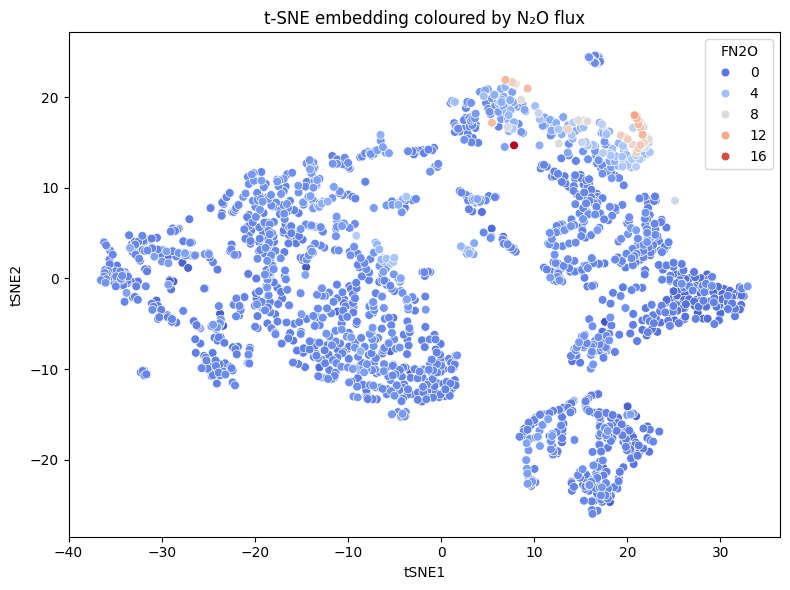

In [41]:
from sklearn.manifold import TSNE

tsne_1 = TSNE(n_components=2, perplexity=90, random_state=42)
X_tsne_1 = tsne_1.fit_transform(X_scaled_1)

tsne_df_1 = pd.DataFrame(X_tsne_1, columns=["tSNE1", "tSNE2"])
tsne_df_1["FN2O"] = y_1.values

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tsne_df_1, x="tSNE1", y="tSNE2",
    hue="FN2O", palette="coolwarm", s=40
)
plt.title("t-SNE embedding coloured by N₂O flux")
plt.tight_layout()
plt.show()

## Oensingen 2021-23

In [42]:
from sklearn.preprocessing import StandardScaler

# Drop or fill NaNs
X_2 = X_2.dropna()
y_2 = y_2.loc[X_2.index]

# Scale predictors
X_scaled_2 = StandardScaler().fit_transform(X_2)

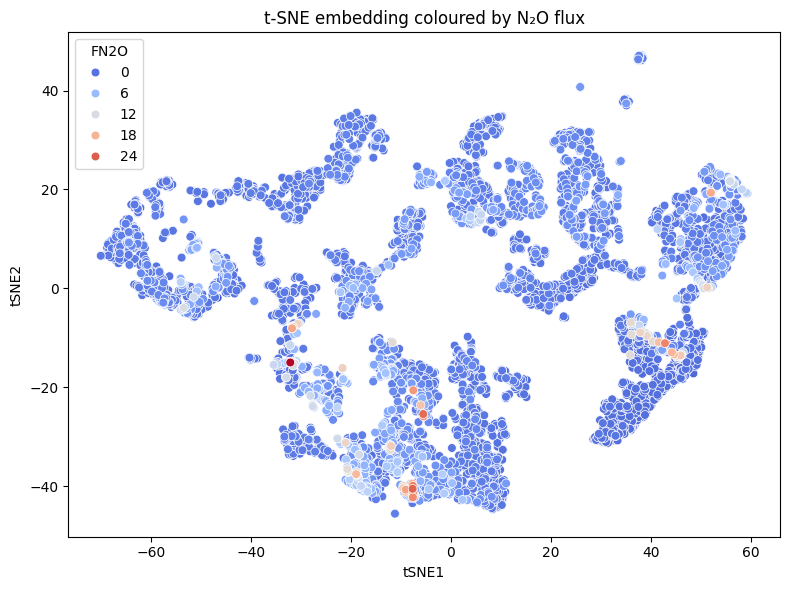

In [43]:
from sklearn.manifold import TSNE

tsne_2 = TSNE(n_components=2, perplexity=90, random_state=42)
X_tsne_2 = tsne_2.fit_transform(X_scaled_2)

tsne_df_2 = pd.DataFrame(X_tsne_2, columns=["tSNE1", "tSNE2"])
tsne_df_2["FN2O"] = y_2.values

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tsne_df_2, x="tSNE1", y="tSNE2",
    hue="FN2O", palette="coolwarm", s=40
)
plt.title("t-SNE embedding coloured by N₂O flux")
plt.tight_layout()
plt.show()

# Other analysis plots

## Oensingen 2018-19

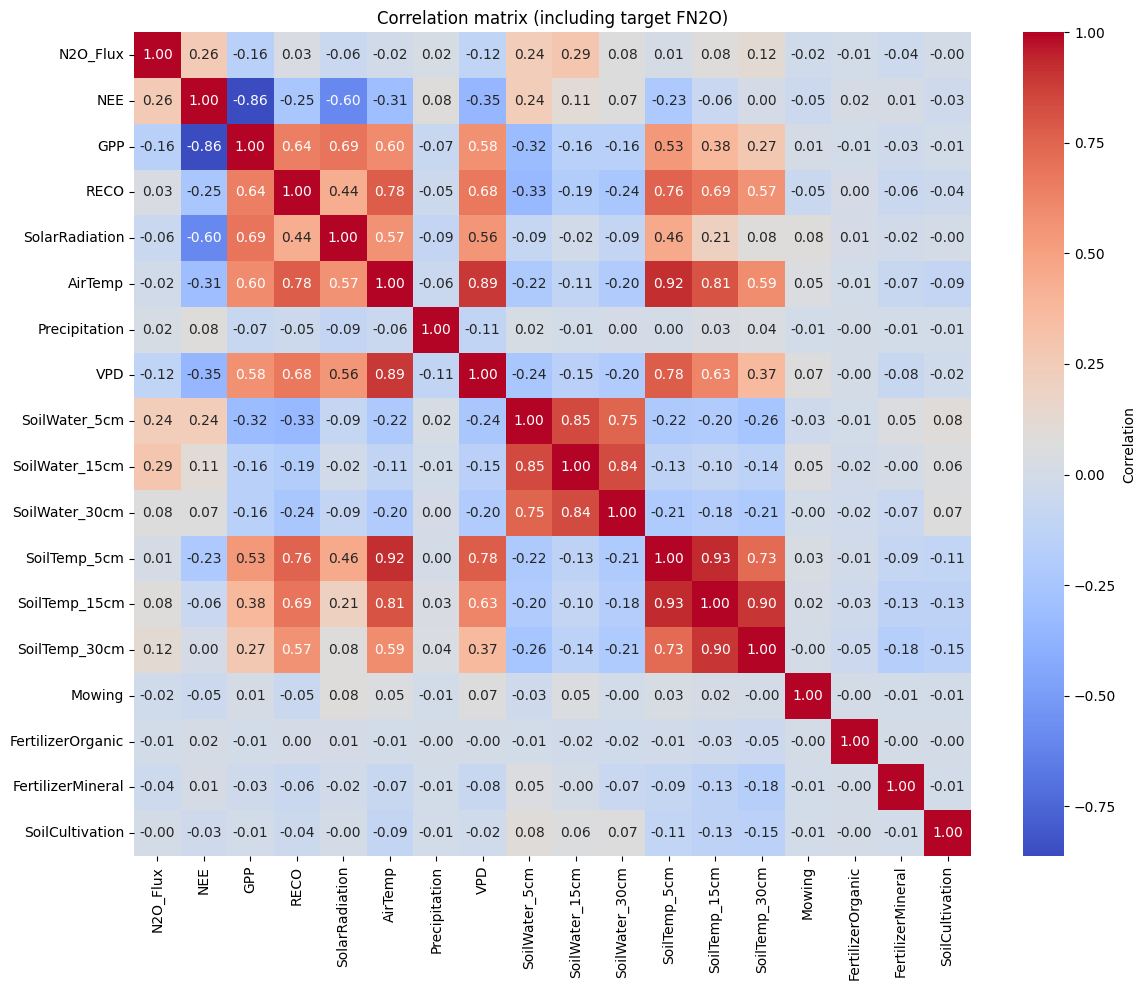

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (Pearson by default)
corr = oensingen_1.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(
    corr, 
    annot=True, fmt=".2f", cmap="coolwarm",
    cbar_kws={'label': 'Correlation'}
)
plt.title("Correlation matrix (including target FN2O)")
plt.tight_layout()
plt.show()

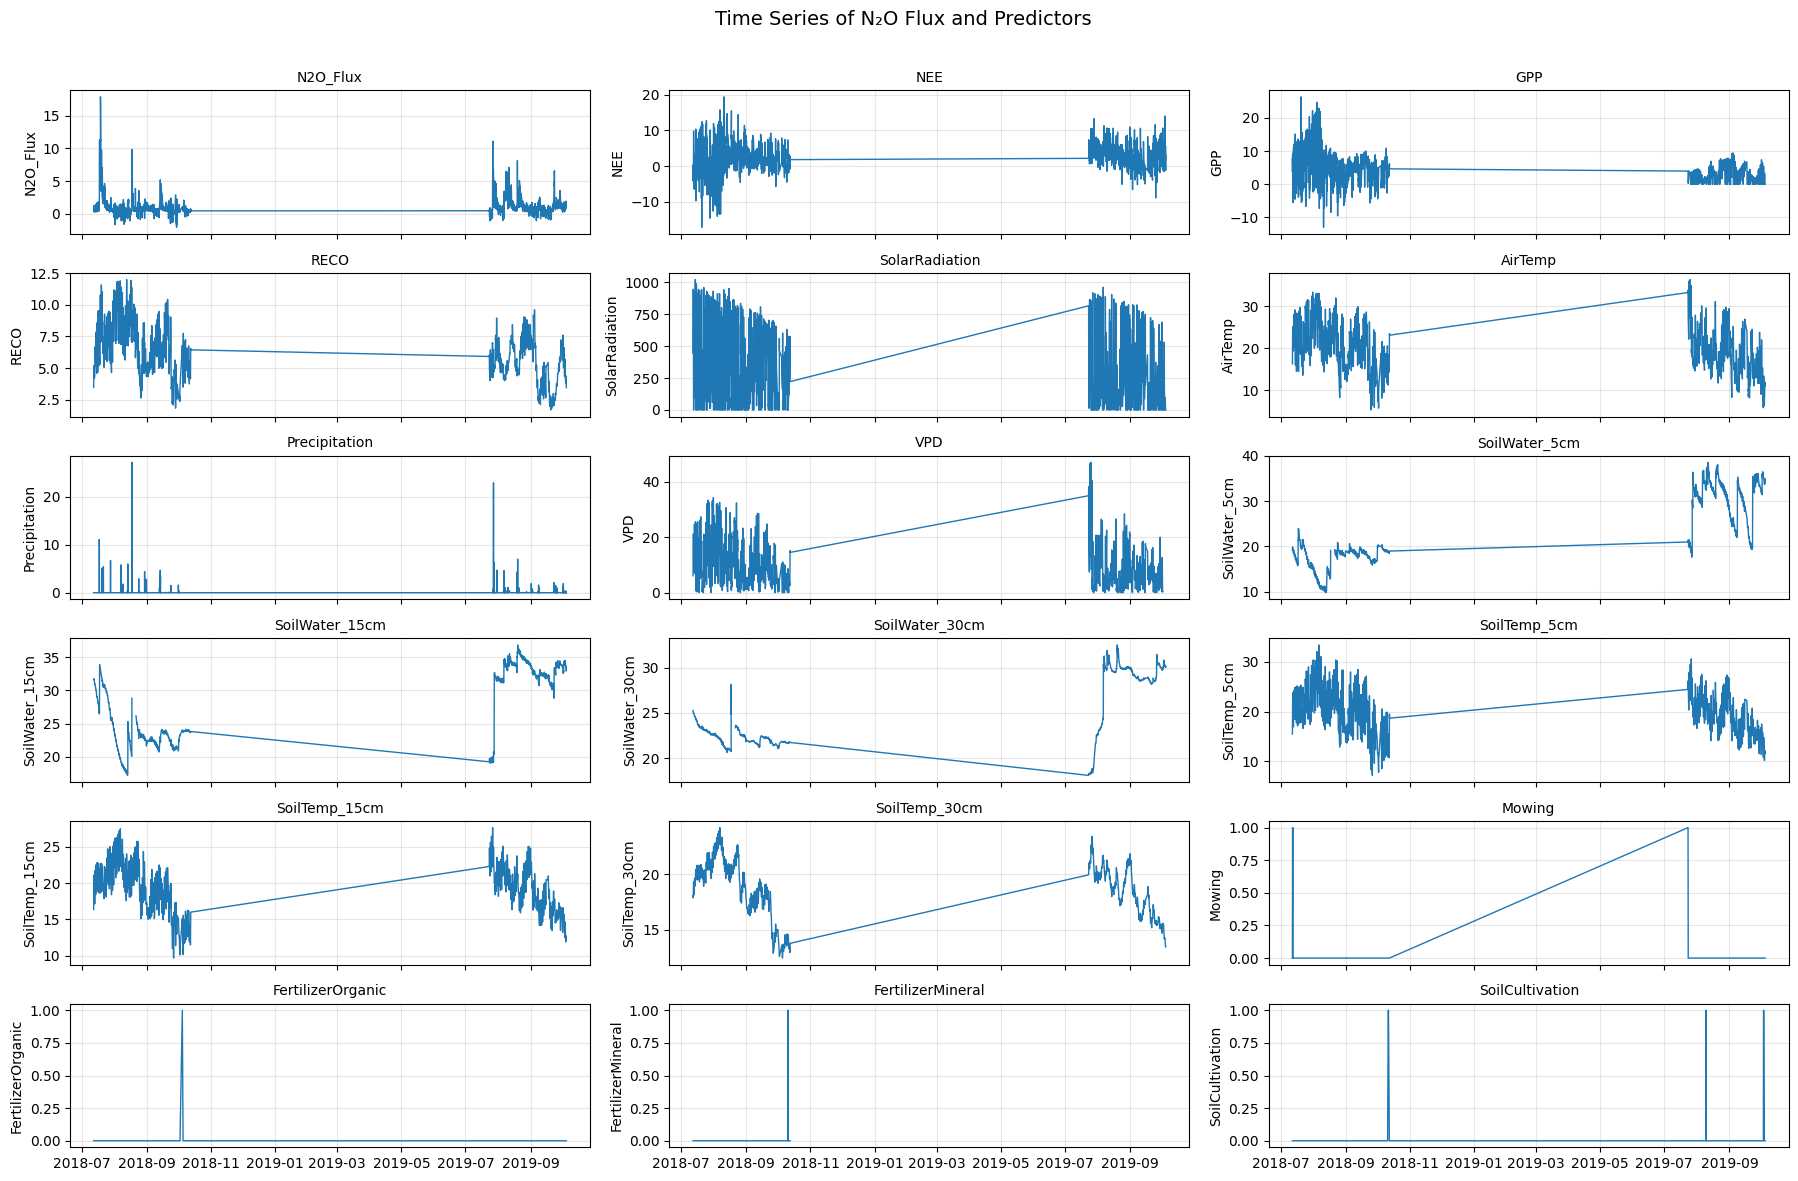

In [48]:
# Variables to plot (excluding Timestamp)
vars_to_plot = [
    "N2O_Flux", "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation",
    "VPD", "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "Mowing", "FertilizerOrganic", "FertilizerMineral", "SoilCultivation"
]

# Create subplots grid
n_cols = 3
n_rows = int(len(vars_to_plot) / n_cols) + (len(vars_to_plot) % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12), sharex=True)
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(vars_to_plot):
    ax = axes[i]
    ax.plot(oensingen_1["Timestamp"], oensingen_1[var], lw=1)
    ax.set_title(var, fontsize=10)
    ax.set_ylabel(var)
    ax.grid(True, alpha=0.3)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Time Series of N₂O Flux and Predictors", fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

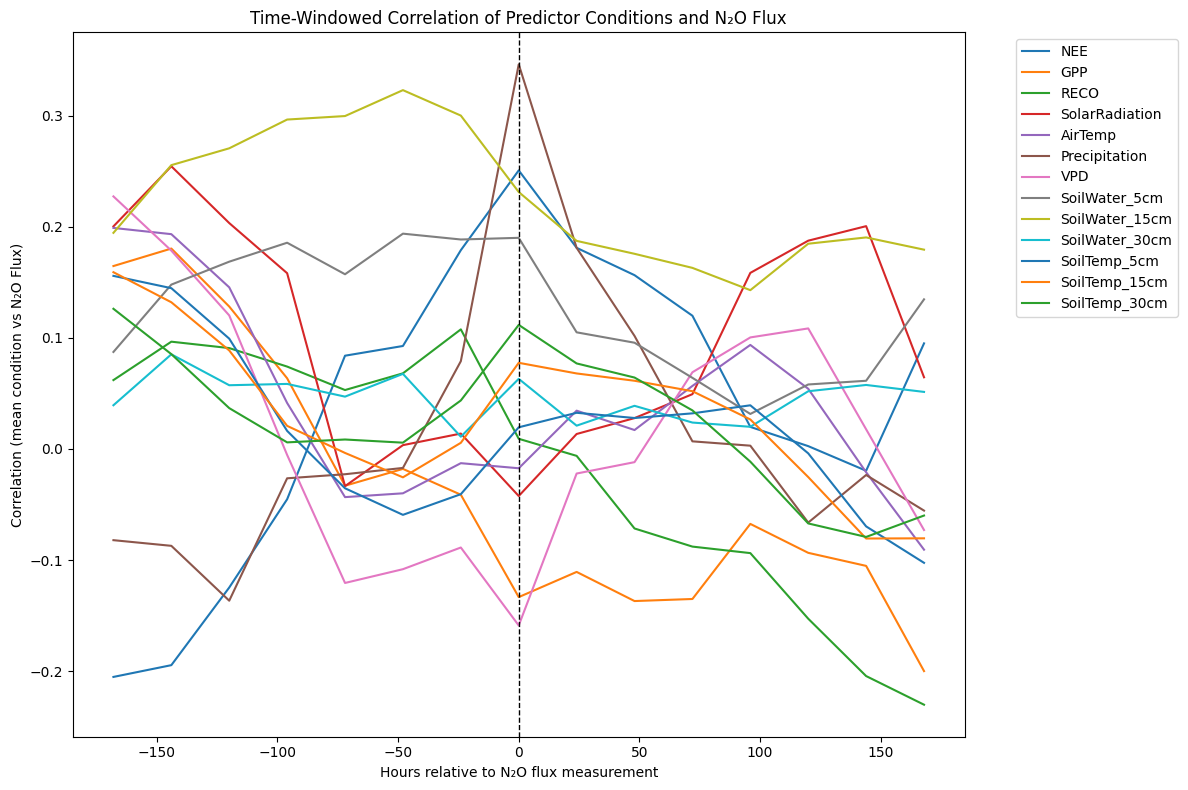

In [50]:
oensingen_1_time_index = oensingen_1.copy()
oensingen_1_time_index = oensingen_1_time_index.set_index("Timestamp")

predictors = [
    "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm", "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    #"Mowing", "FertilizerOrganic", "FertilizerMineral", "SoilCultivation"
]
target = "N2O_Flux"

# --- Parameters ---
window_hours = 24
step_hours   = 24
max_hours    = 7*24 # one week
offsets      = range(-max_hours, max_hours + step_hours, step_hours)

# --- Precompute rolling means ---
window = f"{window_hours}h"
rolling_means = oensingen_1_time_index[predictors].rolling(window=window, closed="left").mean()

# --- Compute lag correlations ---
lag_corrs = {}
for var in predictors:
    corrs = []
    for offset in offsets:
        shifted = rolling_means[var].shift(freq=pd.Timedelta(hours=offset))
        aligned = oensingen_1_time_index[[target]].join(shifted.rename("past_mean"))
        corr = aligned[target].corr(aligned["past_mean"])
        corrs.append(corr)
    lag_corrs[var] = (list(offsets), corrs)

# --- Plot ---
plt.figure(figsize=(12, 8))
for var, (offsets, corrs) in lag_corrs.items():
    plt.plot(offsets, corrs, label=var)

plt.axvline(0, color="k", linestyle="--", lw=1)
plt.xlabel("Hours relative to N₂O flux measurement")
plt.ylabel("Correlation (mean condition vs N₂O Flux)")
plt.title("Time-Windowed Correlation of Predictor Conditions and N₂O Flux")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## Oensingen 2021-23

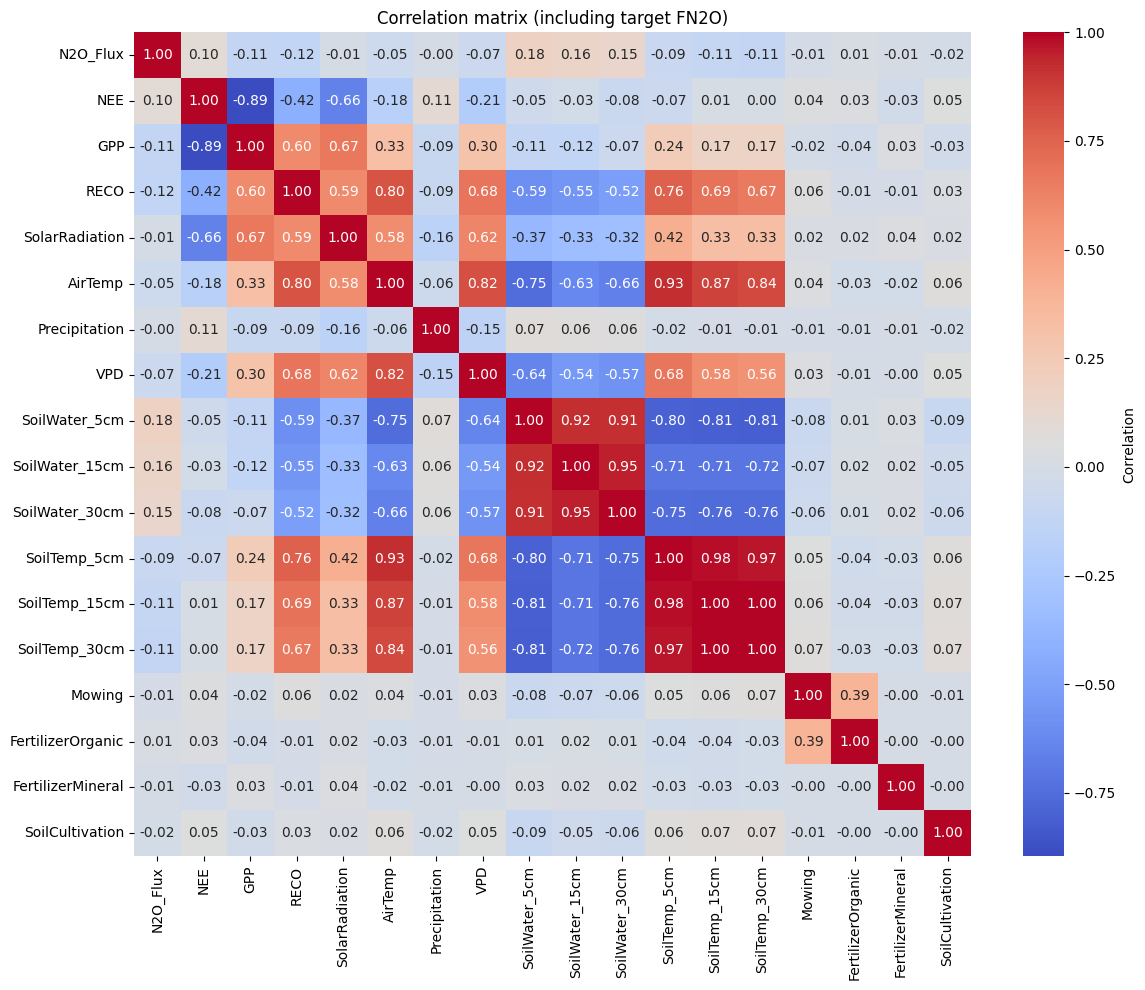

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (Pearson by default)
corr = oensingen_2.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(
    corr, 
    annot=True, fmt=".2f", cmap="coolwarm",
    cbar_kws={'label': 'Correlation'}
)
plt.title("Correlation matrix (including target FN2O)")
plt.tight_layout()
plt.show()

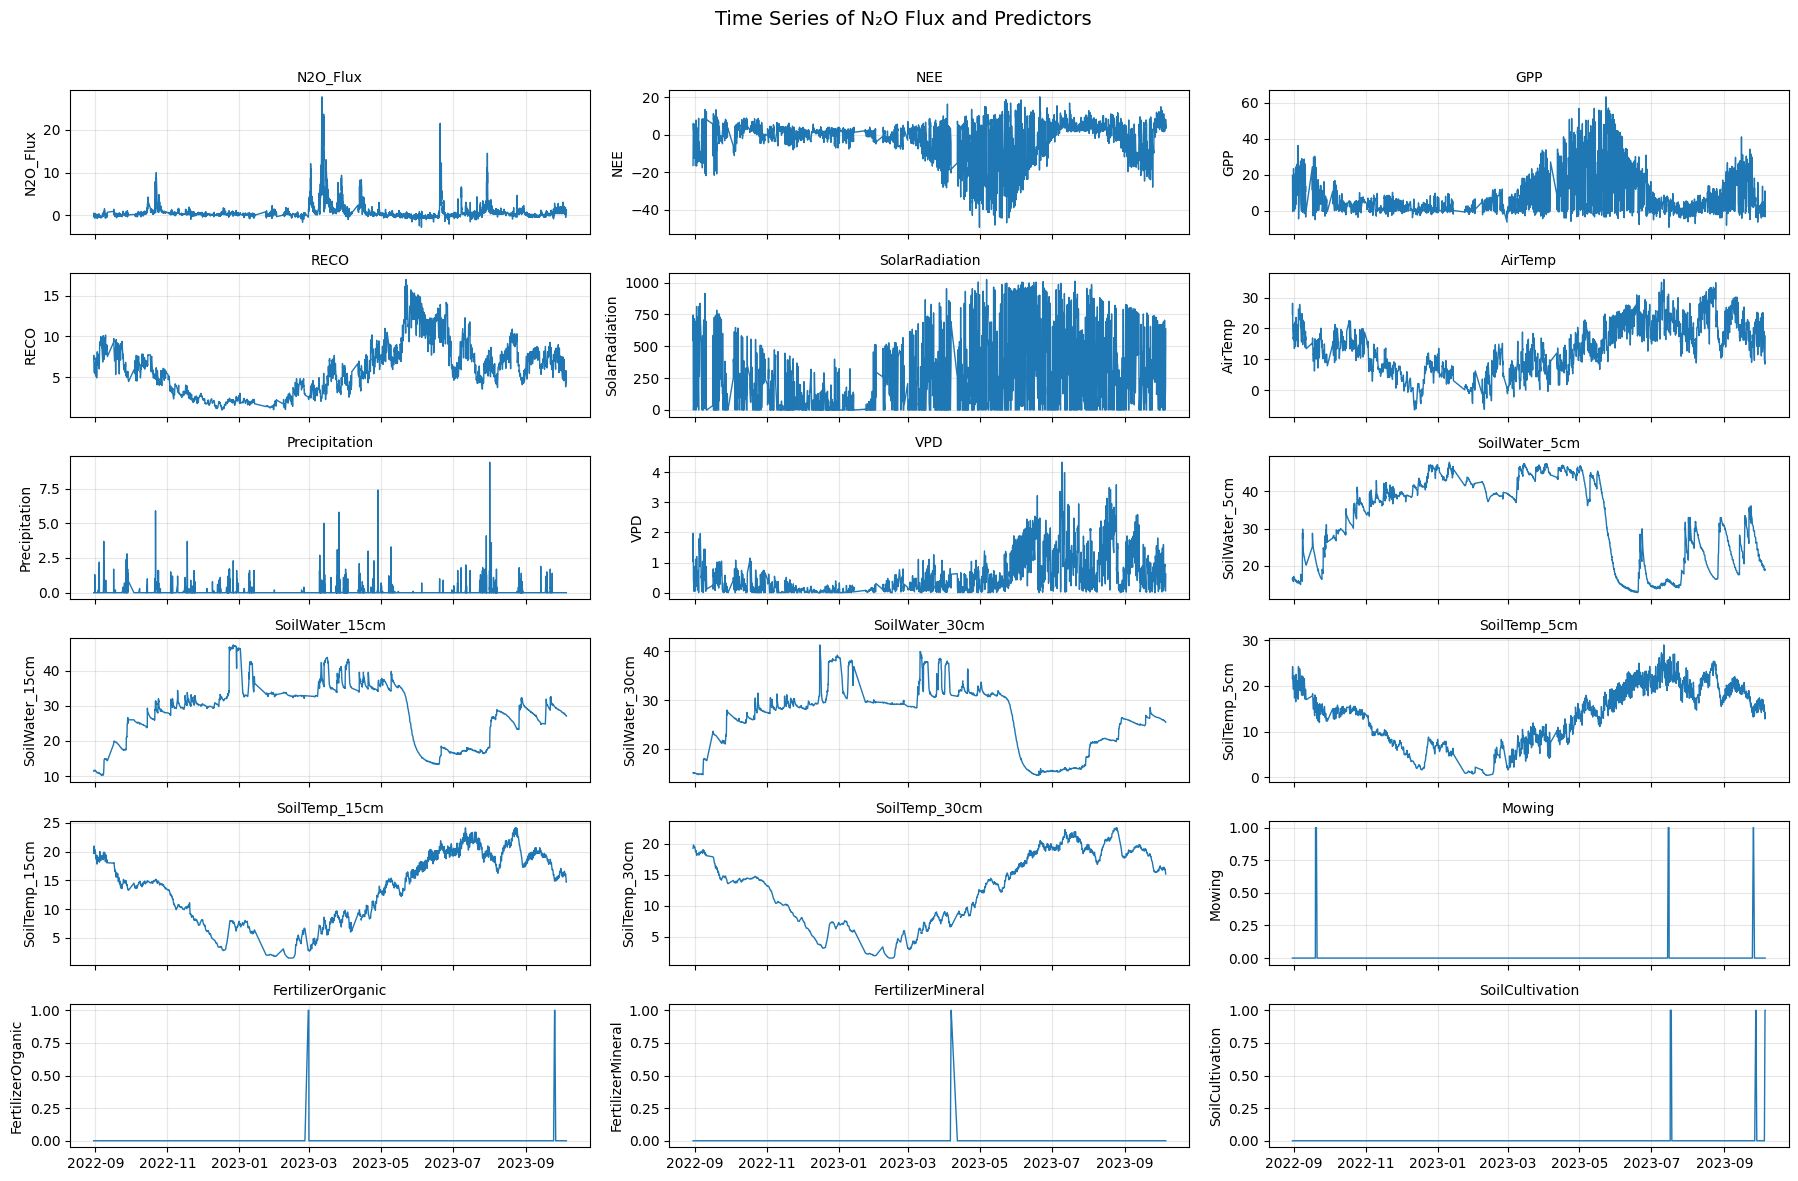

In [49]:
# Variables to plot (excluding Timestamp)
vars_to_plot = [
    "N2O_Flux", "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation",
    "VPD", "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "Mowing", "FertilizerOrganic", "FertilizerMineral", "SoilCultivation"
]

# Create subplots grid
n_cols = 3
n_rows = int(len(vars_to_plot) / n_cols) + (len(vars_to_plot) % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12), sharex=True)
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(vars_to_plot):
    ax = axes[i]
    ax.plot(oensingen_2["Timestamp"], oensingen_2[var], lw=1)
    ax.set_title(var, fontsize=10)
    ax.set_ylabel(var)
    ax.grid(True, alpha=0.3)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Time Series of N₂O Flux and Predictors", fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

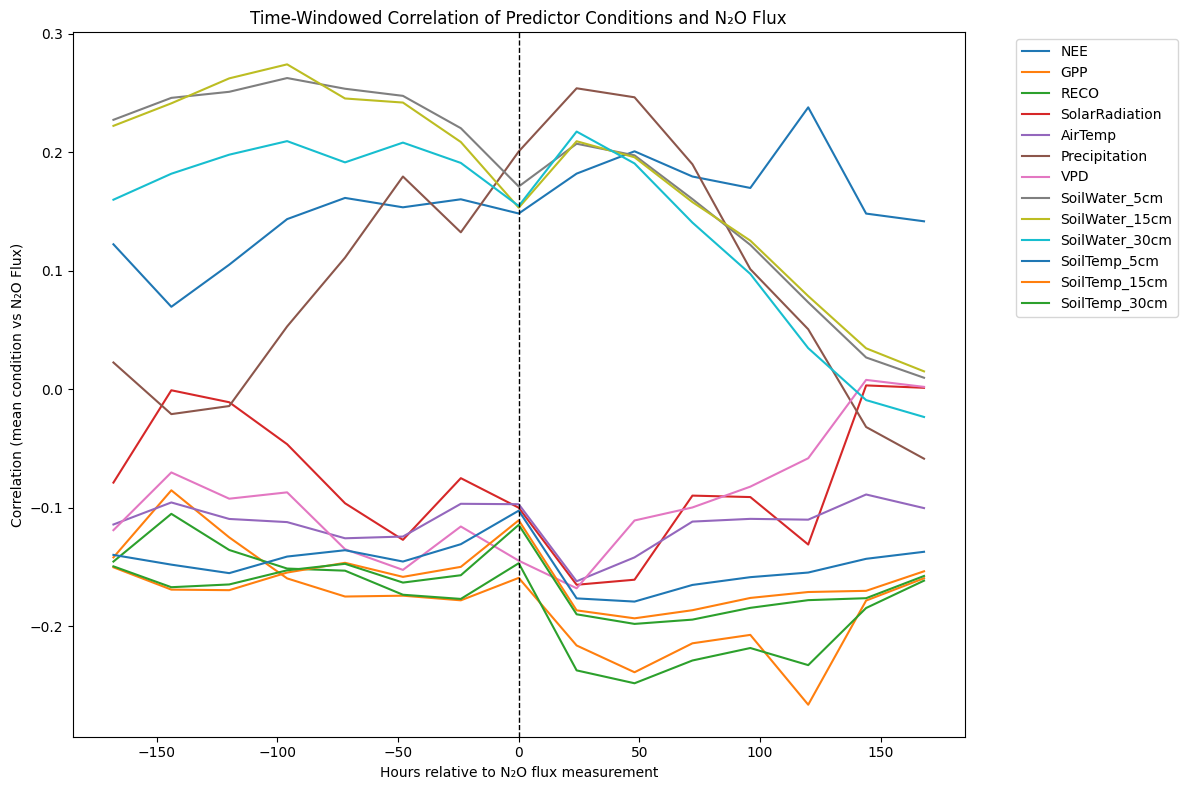

In [51]:
oensingen_2_time_index = oensingen_2.copy()
oensingen_2_time_index = oensingen_2_time_index.set_index("Timestamp")

predictors = [
    "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm", "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    #"Mowing", "FertilizerOrganic", "FertilizerMineral", "SoilCultivation"
]
target = "N2O_Flux"

# --- Parameters ---
window_hours = 24
step_hours   = 24
max_hours    = 7*24 # one week
offsets      = range(-max_hours, max_hours + step_hours, step_hours)

# --- Precompute rolling means ---
window = f"{window_hours}h"
rolling_means = oensingen_2_time_index[predictors].rolling(window=window, closed="left").mean()

# --- Compute lag correlations ---
lag_corrs = {}
for var in predictors:
    corrs = []
    for offset in offsets:
        shifted = rolling_means[var].shift(freq=pd.Timedelta(hours=offset))
        aligned = oensingen_2_time_index[[target]].join(shifted.rename("past_mean"))
        corr = aligned[target].corr(aligned["past_mean"])
        corrs.append(corr)
    lag_corrs[var] = (list(offsets), corrs)

# --- Plot ---
plt.figure(figsize=(12, 8))
for var, (offsets, corrs) in lag_corrs.items():
    plt.plot(offsets, corrs, label=var)

plt.axvline(0, color="k", linestyle="--", lw=1)
plt.xlabel("Hours relative to N₂O flux measurement")
plt.ylabel("Correlation (mean condition vs N₂O Flux)")
plt.title("Time-Windowed Correlation of Predictor Conditions and N₂O Flux")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()